In [1]:
from sys import path
path.append("C:\\Users\\E245713\\Repos\\Bitbucket" + "\\functions")
import pandas as pd
import numpy as np
from common_functions import *
from early_detection import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(color_codes=True)

## TWCTV Live

In [3]:
twctv_live = read_data(r'C:\Users\E245713\Dropbox\Patricia W\DATA\August\roku15_26.xlsx', 'twctv_live', 'B,K:M', 1,4)

In [4]:
twctv_live = normalize(twctv_live)

In [5]:
twctv_live = py_datetime(twctv_live)

In [6]:
data = twctv_live.iloc[:, 1:]
data.index = pd.DatetimeIndex(twctv_live['minute'])

print(data.head())

                     bs_score  fe_score  ds_score
2016-08-15 00:00:00     0.024     0.380     0.326
2016-08-15 00:05:00     0.020     0.312     0.314
2016-08-15 00:10:00     0.022     0.370     0.297
2016-08-15 00:15:00     0.020     0.275     0.326
2016-08-15 00:20:00     0.027     0.321     0.331


In [ ]:
# 1st DRM outage (looking at fe graph, 15 - 17)
detect(data, 240, 24)

In [ ]:
# DRM outage 15 - 17 (looking at bs outage)
detect(data, 480, 18)

In [ ]:
print(data[0:865])

In [7]:
bs, fe, ds, t1, t2, t3 = predict(data, 865, 50)

In [8]:
bs_pred = np.round(bs, 3)
fe_pred = np.round(fe, 3)
ds_pred = np.round(ds, 3)

t1 = np.round(t1, 3)
t2 = np.round(t2, 3)
t3 = np.round(t3, 3)

In [9]:
print(len(bs_pred), len(t1))

300 300


In [10]:
toPlot = pd.DataFrame(twctv_live.loc[865: 1164, 'minute'])
toPlot['bs_pred'] = bs_pred
toPlot['fe_pred'] = fe_pred
toPlot['ds_pred'] = ds_pred
toPlot['bs_obs'] = twctv_live.loc[865:1164, 'bs_score']
toPlot['fe_obs'] = twctv_live.loc[865:1164, 'fe_score']
toPlot['ds_obs'] = twctv_live.loc[865:1164, 'ds_score']
toPlot['bs_thres'] = t1
toPlot['fe_thres'] = t2
toPlot['ds_thres'] = t3

In [11]:
print(toPlot.tail())

                  minute  bs_pred  fe_pred  ds_pred  bs_obs  fe_obs  ds_obs  \
1160 2016-08-19 00:40:00    0.023    0.291    0.385   0.017   0.301   0.360   
1161 2016-08-19 00:45:00    0.022    0.290    0.398   0.022   0.261   0.390   
1162 2016-08-19 00:50:00    0.022    0.288    0.405   0.033   0.286   0.401   
1163 2016-08-19 00:55:00    0.022    0.298    0.387   0.023   0.357   0.378   
1164 2016-08-19 01:00:00    0.022    0.300    0.353   0.021   0.301   0.355   

      bs_thres  fe_thres  ds_thres  
1160     0.024     0.302     0.417  
1161     0.024     0.302     0.417  
1162     0.024     0.302     0.417  
1163     0.024     0.302     0.417  
1164     0.024     0.302     0.417  


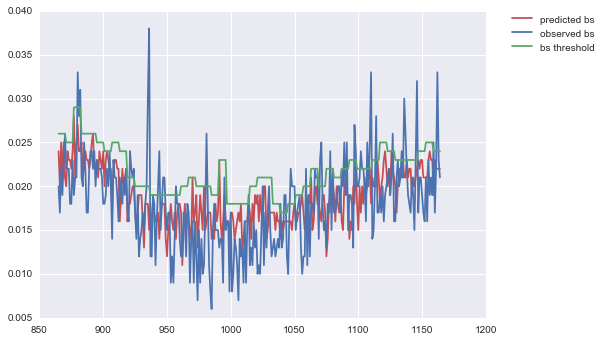

In [12]:
plt.plot(toPlot['bs_pred'], label='predicted bs', color='r')
plt.plot(toPlot['bs_obs'], label='observed bs')
plt.plot(toPlot['bs_thres'], label='bs threshold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
plt.plot(toPlot['fe_pred'], label='predicted fe', color='r')
plt.plot(toPlot['fe_obs'], label='observed fe')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
plt.plot(toPlot['ds_pred'], label='predicted ds', color='r')
plt.plot(toPlot['ds_obs'], label='observed ds')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
toPlot.to_csv('obs_vs_pred', sep='\t')

In [ ]:
x = []

In [ ]:
x += [2] * 8

In [ ]:
x

In [ ]:
x += [3] * 2

In [ ]:
x